In [1]:
%matplotlib inline
import numpy as np
from pandas import DataFrame as df
from Classifiers import TransparentRidge
from scipy.sparse import diags
import matplotlib.pyplot as plt
import PredictiveModels as pm
import pandas as pd
from LatestPreprocessing import *

# User Transparency

In [2]:
pd.set_option('display.width', 100)
user_stats = pd.read_csv('ml-latest/user_stats.csv', sep = ',',nrows=20)
print user_stats.head(10)

   User ID  Number of Ratings  Average Rating  Variance  Genre Ratio  Key Ratio  Fitness
0   242763               1929           2.875     4.092            0      0.040    0.369
1    28451               1274           2.813     3.909            0      0.086    0.305
2    87971               1181           3.383     3.426            0      0.065    0.278
3   155440               1028           2.631     3.292            0      0.085    0.245
4    60484               1224           2.054     3.114            0      0.077    0.234
5   120899               2031           2.662     2.356            0      0.022    0.214
6    46262                747           2.509     3.603            0      0.159    0.202
7   225941               1646           1.797     2.348            0      0.037    0.198
8   170099               2067           3.215     2.179            0      0.021    0.197
9   234450               1798           2.885     2.215            0      0.034    0.187


## Loading user matrix

In [3]:
userid = 28451
user_ratings = get_matched_user_ratings(userid)
movies = user_ratings.keys()
ratings = user_ratings.values()
print "User average rating: ", np.average(ratings)
print "Number of movies rated by this user: ", len(ratings)

User average rating:  2.81842923795
Number of movies rated by this user:  1286


In [4]:
print "Loading average and number of rating"
id_dict = get_id_row_dict()
idxs = [id_dict[k] for k in movies]
avg_and_num = sort_avg()

Loading average and number of rating


## Highest rated movies

In [5]:
movie_set = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
avg_df = df(np.column_stack((movie_set.title,avg_and_num)), columns = ("Movie", "Average Rating", "Number of Ratings"))
print avg_df.loc[avg_df["Number of Ratings"] > 100].sort(["Average Rating", "Number of Ratings"], ascending=[0,0]).head(20)

                                                   Movie Average Rating Number of Ratings
10075                    THE SHAWSHANK REDEMPTION (1994)       4.442559             77367
6085                                THE GODFATHER (1972)       4.354139             49554
3561                           THE USUAL SUSPECTS (1995)       4.319778             52957
18479                            SCHINDLER'S LIST (1993)       4.292279             59539
20916                      THE GODFATHER: PART II (1974)       4.269065             32048
18913                        SHICHININ NO SAMURAI (1954)       4.263744             12696
6943                                  REAR WINDOW (1954)       4.248423             19338
10182             ONE FLEW OVER THE CUCKOO'S NEST (1975)       4.243332             35657
15480                                  FIGHT CLUB (1999)       4.234274             48471
8583                                   CASABLANCA (1942)       4.233015             27715
12624  DR.

In [5]:
all_names = get_movie_names()
names = all_names[idxs]
rating_df = df(np.column_stack((names,ratings)), columns = ("Movie", "Rating"))
print rating_df.sort(["Rating"], ascending=0).head(20)

                                                  Movie Rating
642                        SWISS FAMILY ROBINSON (1960)      5
1                                      TOY STORY (1995)      5
1281          DARBY O'GILL AND THE LITTLE PEOPLE (1959)      5
1279                                  CANDLESHOE (1977)      5
4                                    HOCUS POCUS (1993)      5
5                    FATHER OF THE BRIDE PART II (1995)      5
6                       HONEY, I SHRUNK THE KIDS (1989)      5
1276                          A SHOT IN THE DARK (1964)      5
1274                         YOU ONLY LIVE TWICE (1967)      5
9                                      GOLDENEYE (1995)      5
10                        THE AMERICAN PRESIDENT (1995)      5
1272                             DESIGNING WOMAN (1957)      5
1269                                       BAMBI (1942)      5
13                               THE ITALIAN JOB (1969)      5
1267  A FUNNY THING HAPPENED ON THE WAY TO THE FORUM...

## User rating distribution

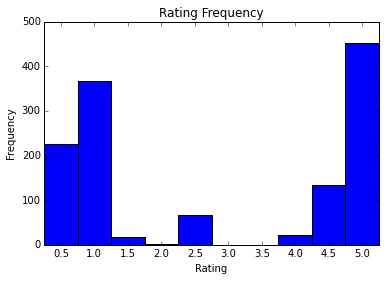

In [7]:
x = ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Genre Distribution

In [6]:
print "Loading genre matrix"
genre_matrix = get_genre_matrix()[idxs]
genre_dict = get_genre_dict()
inv_map = {v: k for k, v in genre_dict.items()}
names = [inv_map[k] for k in range(len(genre_dict))]

Loading genre matrix


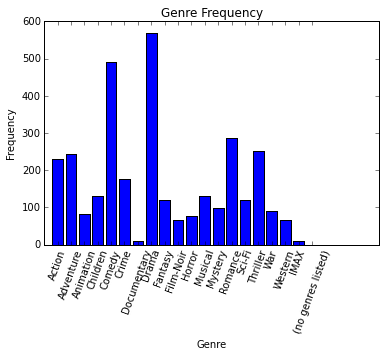

In [9]:
x = np.sum(genre_matrix, axis=0)
his = np.histogram(x, bins = range(0,21))
fig, ax = plt.subplots()
offset = 0
plt.bar(his[1][1:],x,align='center')
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels((list(names)))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.title("Genre Frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

In [9]:
print "Loading key matrix"
keywords = pd.read_csv("ml-latest/matched_movies", delimiter='\t', usecols = [0,3], names = ['id', 'key'] )
x = get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
names = np.array([inv_map[k] for k in range(len(x))])
user_key_matrix = get_keyword_matrix()[idxs]

Loading key matrix
Number of popular keys:

 2336


## User Keyword Frequency

In [12]:
frequency = np.sum(user_key_matrix, axis=0, dtype = int)
indices = np.argsort(frequency)
keyword_df = df((np.column_stack((names[indices], frequency[indices]))), columns = ("Keyword", "Frequency"))
print keyword_df.sort(["Frequency"], ascending = 0).head(20)

                     Keyword Frequency
2184               policeman        99
2180                paranoia        98
2183                adultery        98
2182        held-at-gunpoint        98
2181       subjective-camera        98
2178                cemetery        96
2179  orchestral-music-score        96
2175     extramarital-affair        95
2177              redemption        95
2176                 funeral        95
2171                  camera        94
2174         number-in-title        94
2173            photographer        94
2172              first-part        94
2170                   nurse        93
2169                   1980s        93
2168              foot-chase        92
2167                   1940s        92
2166  los-angeles-california        92
2165                   theft        92


## User Actor Frequency

In [8]:
print "Loading actor matrix"
actor_matrix = get_actor_matrix()[idxs]
frequency = np.sum(actor_matrix, axis=0)
names = get_actor_names()
actor_df = df((np.column_stack((names, frequency))), columns = ("Actor", "Frequency"))
print actor_df.sort_index(by=["Frequency"], ascending = 0).head(20)

Loading actor matrix
                    Actor Frequency
400     Blystone, Stanley       9.0
1738         Tornek, Jack       9.0
2      Adams, Dorothy (I)       9.0
1185  Madsen, Michael (I)       9.0
1611       Seymour, Harry       9.0
1188         Malden, Karl       9.0
1608   Sellers, Peter (I)       9.0
1629      Shields, Arthur       9.0
1200    Mark, Michael (I)       9.0
909    Hayward, Chuck (I)       9.0
10         Bacall, Lauren       9.0
776   Freeman, Morgan (I)       9.0
1211    Martin, Steve (I)       9.0
1586          Saylor, Syd       9.0
1086     Kruger, Paul (I)       9.0
770       Fowley, Douglas       9.0
769         Foulk, Robert       9.0
906            Hawn, Phil       9.0
1578   Sanford, Ralph (I)       9.0
1226      Mayo, Frank (I)       9.0

## Finding min alpha for user

In [10]:
pp.scale(avg_and_num[:,0], with_mean=True, with_std=True, copy=False)
pp.scale(avg_and_num[:,1], with_mean=True, with_std=True, copy=False)
data = np.column_stack((avg_and_num[idxs], genre_matrix, user_key_matrix, actor_matrix))
target = ratings
alphas = np.arange(10,30,2)
min_ridge_mae = 2
avg_mae_list =list()
for alpha in alphas:
    mae_list = list()
    results = pm.get_ridge_cv_results(np.column_stack((data,target)), alpha, 10)
    mae = results[0]
    mae_list.append(results[0])
    if mae < min_ridge_mae:
        min_ridge_mae = mae
        min_ridge_alpha = alpha
        min_ridge_maes = mae_list
    avg_mae_list.append(mae)
print pd.DataFrame(np.column_stack((alphas,avg_mae_list)), columns = ['Alpha', 'MAE'])
print "Optimal alpha is: ", min_ridge_alpha

   Alpha       MAE
0     10  1.617262
1     12  1.602065
2     14  1.590492
3     16  1.581914
4     18  1.574985
5     20  1.569442
6     22  1.564927
7     24  1.561454
8     26  1.558696
9     28  1.556488
Optimal alpha is:  28


## Creating Ridge Model with Cross Validation and 10 Folds

In [11]:
results = pm.get_ridge_cv_results(np.column_stack((data,target)), min_ridge_alpha, 10)

y_pred = results[2]
ratings = user_ratings.values()
error_from_pred = np.abs(ratings-y_pred)

col_names = ["Movie ID" ,"User Rating","Model Prediction","Model Error"]

col_avg = ["Average:", np.average(ratings),np.average(y_pred),np.average(error_from_pred)]
user_result = np.column_stack((user_ratings.keys(), ratings, y_pred, error_from_pred))
user_result = user_result[np.argsort(user_result[:, 3])]
user_result = np.vstack((user_result,col_avg))

results_df = pd.DataFrame(user_result, columns = col_names)
print "Ten Lowest Errors"
print results_df.head(10)
print "\nTen Highest Errors"
print results_df.tail(10)

Ten Lowest Errors
  Movie ID User Rating Model Prediction       Model Error
0    762.0         1.0   0.998595808076  0.00140419192422
1   5952.0         5.0    5.00490072335  0.00490072335312
2   2207.0         1.0   0.993768980269  0.00623101973067
3   3668.0         0.5   0.493683023836  0.00631697616372
4    733.0         5.0    4.99182171655  0.00817828344517
5   2858.0         1.0   0.990443627515  0.00955637248484
6    597.0         4.5    4.49013928139  0.00986071860604
7  26230.0         1.0   0.989013047124   0.0109869528759
8   6031.0         0.5   0.484500859801   0.0154991401986
9    239.0         4.5    4.48351331634   0.0164866836616

Ten Highest Errors
      Movie ID    User Rating Model Prediction    Model Error
1277    4426.0            0.5    5.04488689984  4.54488689984
1278    2000.0            5.0   0.433811890965  4.56618810903
1279    3438.0            0.5    5.32383762634  4.82383762634
1280     296.0            1.0    6.16008995934  5.16008995934
1281     943.0

## Creating Ridge Model with Full Training Set

In [12]:
clf =TransparentRidge(min_ridge_alpha)
user_cols = data.shape[1]+1
clf.fit(data,target)
weights = clf.coef_
neg_evi, pos_evi = clf.predict_evidences(data)
bias = clf.get_bias()
y_pred = clf.predict(data)
indices = np.argsort(y_pred)
coef_diags = diags(clf.coef_, 0)
dm = data * coef_diags

## Weights and Features

In [13]:
get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
key_names = [inv_map[k] for k in range(len(x))]
genre_names = get_genre_dict().keys()
actor_names = get_actor_names()
features = np.hstack([['Average Rating', 'Number of Ratings'], genre_names, key_names, actor_names])

positive_weight_indices = weights > 0
negative_weight_indices = weights < 0

positive_features = np.column_stack((features[positive_weight_indices], weights[positive_weight_indices].astype(float)))
negative_features = np.column_stack((features[negative_weight_indices], weights[negative_weight_indices].astype(float)))

positive_df = pd.DataFrame(positive_features, columns = ["Features", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)
positive_df = positive_df.sort("Weights", ascending=0)

negative_df = pd.DataFrame(negative_features, columns = ["Features", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

negative_df = negative_df.sort("Weights", ascending=1)

print positive_df.head(10)
print negative_df.head(10)

                  Features   Weights
0           Average Rating  0.704269
3                   Sci-Fi  0.629632
4                   Horror  0.625228
1148             fistfight  0.344994
164               evil-man  0.342521
1593      Harris, Sam (II)  0.308047
161          impersonation  0.304177
203            blockbuster  0.299325
2                     IMAX  0.295479
87    semiautomatic-pistol  0.271309
              Features   Weights
3                Drama -0.471356
913   independent-film -0.395227
5            Animation -0.372366
657               farm -0.318907
483    telephone-booth -0.311595
1094        tough-girl -0.289038
1147     exploding-car -0.281041
393              money -0.273043
509         alienation -0.263211
407                gay -0.259587


## The Highest Predicted Rating

In [21]:
j = indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  TOY STORY (1995)
Actual User Rating:  5.0
Predicted User Rating:  5.76834226412


### Movie Rating Distribution

Number of Ratings: 17023


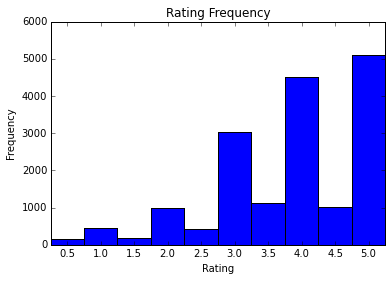

In [17]:
ratings = pd.read_csv("ml-latest/ratings.csv", delimiter=',', quotechar='"', names = ['userId', 'movieId', 'rating'])
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [23]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  5.76834226412
Bias and evidences: 2.09327870049 -3.9673688118 7.64243237542
Positive Features
             Feature  Weights
0  Number of Ratings   1.2855
1     Average Rating   0.7963
2             Sci-Fi   0.6296
3             Horror   0.6252
4          fistfight   0.3450
5        blockbuster   0.2993
6               IMAX   0.2955
7           neighbor   0.1746
8              bully   0.1713
9             escape   0.1633
Negative Features
              Feature  Weights
0   slow-motion-scene  -0.2540
1           cult-film  -0.2458
2            fighting  -0.2006
3  computer-animation  -0.1811
4         little-girl  -0.1547
5                baby  -0.1511
6               brawl  -0.1478
7             yelling  -0.1461
8          friendship  -0.1324
9          little-boy  -0.1293


## The Lowest Rating

In [24]:
j = indices[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  FRIDAY THE 13TH PART VIII: JASON TAKES MANHATTAN (1989)
Actual User Rating:  0.5
Predicted User Rating:  -0.0764657748449


### Movie Rating Distribution

Number of Ratings: 1269


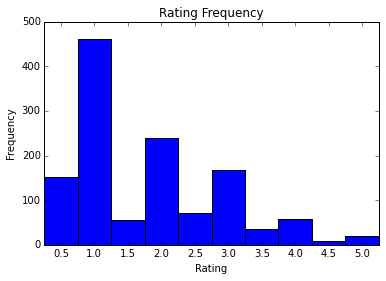

In [25]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [27]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  -0.0764657748449
Bias and evidences: 2.09327870049 -5.25999687763 3.0902524023
Positive Features
                        Feature  Weights
0                      evil-man   0.3425
1               psycho-thriller   0.2022
2                        sequel   0.1684
3               numbered-sequel   0.1476
4                male-underwear   0.1415
5                      drowning   0.1366
6                police-officer   0.1278
7  teacher-student-relationship   0.1240
8                      necklace   0.1200
9                        maniac   0.1163
Negative Features
              Feature  Weights
0      Average Rating  -1.1641
1    independent-film  -0.3952
2           Animation  -0.3724
3       exploding-car  -0.2810
4           cult-film  -0.2458
5               1980s  -0.2244
6  supernatural-power  -0.2058
7    stabbed-to-death  -0.2042
8               blood  -0.1421
9               woods  -0.1346


## The case that has the most negative evidence, regardless of positive evidence

In [28]:
j = np.argsort(neg_evi)[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  GONE WITH THE WIND (1939)
Actual User Rating:  0.5
Predicted User Rating:  0.6910743895


### Movie Rating Distribution

Number of Ratings: 17023


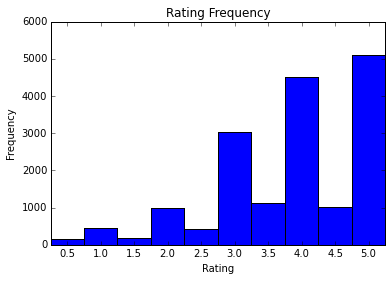

In [29]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [30]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  0.6910743895
Bias and evidences: 2.09327870049 -10.8679774792 9.46577316824
Positive Features
             Feature  Weights
0     Average Rating   0.7314
1  Number of Ratings   0.3485
2        blockbuster   0.2993
3          christian   0.2363
4         photograph   0.2341
5          champagne   0.2059
6              honor   0.1928
7              major   0.1803
8               whip   0.1758
9              grave   0.1684
Negative Features
                        Feature  Weights
0                         Drama  -0.4714
1                         money  -0.2730
2  mother-daughter-relationship  -0.2375
3                          barn  -0.2319
4                mental-illness  -0.2186
5                self-sacrifice  -0.1895
6                        secret  -0.1880
7                         thief  -0.1858
8                       servant  -0.1844
9                          maid  -0.1839


## The case that has the most positive evidence, regardless of negative evidence

In [31]:
j = np.argsort(pos_evi)[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  NORTH BY NORTHWEST (1959)
Actual User Rating:  5.0
Predicted User Rating:  5.68971112836


### Movie Rating Distribution

Number of Ratings: 17787


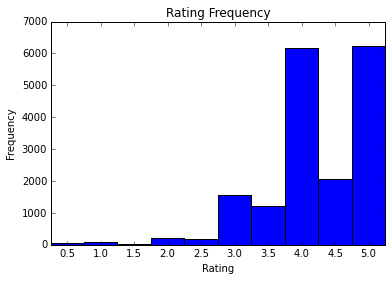

In [32]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [33]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  5.68971112836
Bias and evidences: 2.09327870049 -7.06355839781 10.6599908257
Positive Features
                 Feature  Weights
0         Average Rating   1.0966
1      Number of Ratings   0.3651
2              fistfight   0.3450
3               evil-man   0.3425
4            blockbuster   0.2993
5               suspense   0.2597
6  Hitchcock, Alfred (I)   0.2521
7             photograph   0.2341
8         telephone-call   0.2339
9        Grant, Cary (I)   0.2005
Negative Features
             Feature  Weights
0      cult-director  -0.2416
1         kidnapping  -0.2231
2          telephone  -0.1808
3          professor  -0.1802
4     premarital-sex  -0.1787
5                gun  -0.1739
6  airplane-accident  -0.1720
7                bus  -0.1718
8   Faylauer, Adolph  -0.1580
9           betrayal  -0.1561


# Most conflicted

In [15]:
conflict = np.min([abs(neg_evi), pos_evi], axis=0)
indices = np.argsort(conflict)
j=indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  GONE WITH THE WIND (1939)
Actual User Rating:  0.5
Predicted User Rating:  0.6910743895


### Movie Rating Distribution

Number of Ratings: 17023


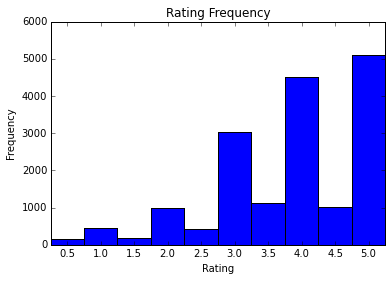

In [18]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [19]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  0.6910743895
Bias and evidences: 2.09327870049 -10.8679774792 9.46577316824
Positive Features
             Feature  Weights
0     Average Rating   0.7314
1  Number of Ratings   0.3485
2        blockbuster   0.2993
3          christian   0.2363
4         photograph   0.2341
5          champagne   0.2059
6              honor   0.1928
7              major   0.1803
8               whip   0.1758
9              grave   0.1684
Negative Features
                        Feature  Weights
0                         Drama  -0.4714
1                         money  -0.2730
2  mother-daughter-relationship  -0.2375
3                          barn  -0.2319
4                mental-illness  -0.2186
5                self-sacrifice  -0.1895
6                        secret  -0.1880
7                         thief  -0.1858
8                       servant  -0.1844
9                          maid  -0.1839


# Least amount of info

In [20]:
information = np.max([abs(neg_evi), pos_evi], axis=0)
indices = np.argsort(information)
j=indices[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  THE NORTH AVENUE IRREGULARS (1979)
Actual User Rating:  4.5
Predicted User Rating:  2.63389039754


### Movie Rating Distribution

Number of Ratings: 25


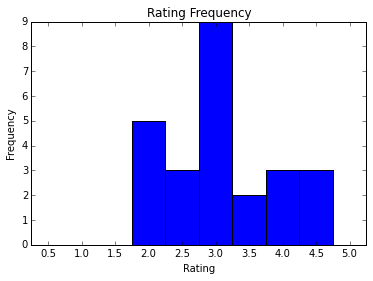

In [21]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [22]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  2.63389039754
Bias and evidences: 2.09327870049 -0.155326739431 0.695938436483
Positive Features
              Feature  Weights
0            neighbor   0.1746
1           Film-Noir   0.1373
2              church   0.1333
3                gang   0.0818
4    Herrmann, Edward   0.0666
5  Hale Jr., Alan (I)   0.0503
6      Average Rating   0.0381
7       based-on-book   0.0110
8    Leachman, Cloris   0.0031
Negative Features
             Feature  Weights
0  Bennett, Marjorie  -0.0615
1           minister  -0.0405
2            Mystery  -0.0225
3  Number of Ratings  -0.0201
4    Fowley, Douglas  -0.0108


## Defining movie matrix for unrated films

In [ ]:
user_cols = user_matrix.shape[1]
data = user_matrix[:, 1:(user_cols-1)]
target = user_matrix[:, (user_cols-1)]
user_rated = user_matrix[:, 0]-1
movie_file = open("postprocessed-data/movie_matrix", "r")
movie_matrix = pickle.load(movie_file)[:, 1:]
movie_file.close()

## Predicting unrated films using Lasso and 5 fold cross validation

In [ ]:
clf =TransparentLasso(min_lasso_alpha)
clf.fit(data,target)
all_pred = clf.predict(movie_matrix)
unrated_pred = np.delete(all_pred, user_rated, 0)
indices = np.argsort(unrated_pred)[::-1]
unrated_movies = np.delete(movies, user_rated, 0)
sorted_movies = unrated_movies[indices]
movie_df = pd.DataFrame(np.column_stack((sorted_movies,unrated_pred[indices])), columns = ['Movie', 'Prediction'])
print "Top predicted movies"
print movie_df.head(10)
print "Lowest predicted movies"
print movie_df.tail(10)